# Text Analysis With Python 

This workshop covers a number of text analysis techniques using Python. You are welcome to follow along in the IDE of your choice, but the instructors will be using Jupyter Lab.

## Be sure you have the following packages installed
- **pandas**
- **sklearn**
- **seaborn**
- **textblob**

Additionally, we will be using **os and re**

if you do not have them installed, you can run `pip install pandas scikit-learn seaborn textblob` in your terminal or uncomment and run the cell below

In [1]:
#!pip install pandas scikit-learn seaborn textblob

## Python Packages often used for Text Analysis
- Directly related to Text Analysis
    - [NLTK](https://www.nltk.org/index.html)
    - [spaCy](https://spacy.io/)
    - [Textblob](https://textblob.readthedocs.io/en/dev/)
    - [Gensim](https://radimrehurek.com/gensim/)
    - [Transformers](https://huggingface.co/docs/transformers/en/index)

- Useful tools for text analysis
    - [Pandas](https://pandas.pydata.org/docs/index.html)
    - [Scikit-Learn](https://scikit-learn.org/stable/index.html)
    - [Matplotlib](https://matplotlib.org/stable/)


## Mini-project 1: Word Frequencies

#### Data: [Jane Eyre - Charlotte Brontë](https://www.gutenberg.org/files/1260/1260-h/1260-h.htm)


Extracting word frequencies is a common text analysis approach that allows us to see the most or least common words or the frequencies of chosen words from a corpus of text. In order to extract word frequencies, we use a **bag-of-words** model of representing the text, which involves 1) a vocabulary of unique words in a corpus and 2) measuring the presence of these words within the documents in the corpus. In order to do this we break down text into **tokens**, which is a unit of of characters that we will use for processing the data. Tokens can be sentences, individual words (**unigrams**), pairs of words (**bigrams**), or sequences of any length (**n-grams**).

##### 1. Load in text

We're going to use `urlretrieve` to save a local copy of the Jane Eyre text file.

In [2]:
from urllib.request import urlretrieve

urlretrieve('https://www.gutenberg.org/cache/epub/1260/pg1260.txt', 'jane_eyre.txt')

doc = open('jane_eyre.txt', 'r').readlines()


We can see that the text file is read line by line, so we're going to have to split the list into sections.

In [3]:
doc[:20]

['\ufeffThe Project Gutenberg eBook of Jane Eyre: An Autobiography\n',
 '    \n',
 'This ebook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n',
 'of the Project Gutenberg License included with this ebook or online\n',
 'at www.gutenberg.org. If you are not located in the United States,\n',
 'you will have to check the laws of the country where you are located\n',
 'before using this eBook.\n',
 '\n',
 'Title: Jane Eyre: An Autobiography\n',
 '\n',
 'Author: Charlotte Brontë\n',
 '\n',
 'Illustrator: F. H. Townsend\n',
 '\n',
 'Release date: March 1, 1998 [eBook #1260]\n',
 '                Most recently updated: May 2, 2023\n',
 '\n',
 'Language: English\n']

We're going to focus on the text from the preface and chapters from the book. First, we're obtaining the indexes of of where these section titles appear in the list of lines from the text.

In [4]:
chapter_idx = []

for idx, line in enumerate(doc):
    if 'CHAPTER' in line:
        chapter_idx.append((idx, line.strip()))
        
print(chapter_idx)

[(172, 'CHAPTER I'), (401, 'CHAPTER II'), (690, 'CHAPTER III'), (1088, 'CHAPTER IV'), (1737, 'CHAPTER V'), (2313, 'CHAPTER VI'), (2648, 'CHAPTER VII'), (3023, 'CHAPTER VIII'), (3354, 'CHAPTER IX'), (3707, 'CHAPTER X'), (4182, 'CHAPTER XI'), (4877, 'CHAPTER XII'), (5322, 'CHAPTER XIII'), (5854, 'CHAPTER XIV'), (6409, 'CHAPTER XV'), (6926, 'CHAPTER XVI'), (7348, 'CHAPTER XVII'), (8228, 'CHAPTER XVIII'), (8867, 'CHAPTER XIX'), (9387, 'CHAPTER XX'), (10110, 'CHAPTER XXI'), (11090, 'CHAPTER XXII'), (11373, 'CHAPTER XXIII'), (11858, 'CHAPTER XXIV'), (12712, 'CHAPTER XXV'), (13267, 'CHAPTER XXVI'), (13748, 'CHAPTER XXVII'), (14855, 'CHAPTER XXVIII'), (15614, 'CHAPTER XXIX'), (16161, 'CHAPTER XXX'), (16577, 'CHAPTER XXXI'), (16906, 'CHAPTER XXXII'), (17386, 'CHAPTER XXXIII'), (17990, 'CHAPTER XXXIV'), (18961, 'CHAPTER XXXV'), (19442, 'CHAPTER XXXVI'), (19872, 'CHAPTER XXXVII'), (20851, 'CHAPTER XXXVIII—CONCLUSION')]


Now, we're going to push a list of lines that pertain to the certain section into a new list.

In [5]:
chapter_texts = []

for idx, ch in enumerate(chapter_idx):
    # Skipping the first line of the section to cut out the chapter title
    start_line = ch[0]+1
    
    # Setting the end line of the chapter based on when the following chapter starts
    try:
        end_line = chapter_idx[idx+1][0]
    except:
        end_line = len(doc)
        
    # Adds text to the list of chapter texts
    chapter_texts.append(doc[start_line:end_line])    

In [6]:
# the first ten lines from the preface
chapter_texts[0][:10]

['\n',
 '\n',
 'There was no possibility of taking a walk that day. We had been\n',
 'wandering, indeed, in the leafless shrubbery an hour in the morning;\n',
 'but since dinner (Mrs. Reed, when there was no company, dined early)\n',
 'the cold winter wind had brought with it clouds so sombre, and a rain\n',
 'so penetrating, that further outdoor exercise was now out of the\n',
 'question.\n',
 '\n',
 'I was glad of it: I never liked long walks, especially on chilly\n']

##### 2. Processing the text

Most text analysis projects require a number of steps to **preprocess** the text. Usually, this involves removing undesired characters such as punctuation and line breaks. Below, we use [**regular expressions**](https://docs.python.org/3/library/re.html) to achieve this task. 

We have the text we want, but now we have to process the text we're working with. This involves removing line breaks (`\n`) and punctuation. In other cases, this might involve stemming or lemmatizing words. 

In [7]:
import re

# join the lines together first with nested list comprehensions while removing items that are only line breaks
joined_chs = [''.join([line for line in ch if line != '\n']) for ch in chapter_texts]

print(joined_chs[0][:250])

There was no possibility of taking a walk that day. We had been
wandering, indeed, in the leafless shrubbery an hour in the morning;
but since dinner (Mrs. Reed, when there was no company, dined early)
the cold winter wind had brought with it clouds 


In [8]:
# replace remaining break lines with spaces
no_bl_chs = [re.sub(r'\n', ' ', ch) for ch in joined_chs]

print(no_bl_chs[0][:250])

There was no possibility of taking a walk that day. We had been wandering, indeed, in the leafless shrubbery an hour in the morning; but since dinner (Mrs. Reed, when there was no company, dined early) the cold winter wind had brought with it clouds 


Since we're going going to be using sentences are our documenet length instead of chapters, we need to remove the periods after "Mr" and "Mrs" to prevent sentences being split at the wrong place (i.e. `"Mr. Rochester goes..."` => `["Mr", "Rochester goes..."]`)

In [9]:
# remove punctuation except periods
no_punct_chs = [re.sub(r'[:;,_“”\'\(\)]', '', ch) for ch in no_bl_chs]

# remove periods after Mr and Mrs
no_punct_chs=[re.sub(r'(?<=Mr)\.', '', ch) for ch in no_punct_chs]
no_punct_chs=[re.sub(r'(?<=Mrs)\.', '', ch) for ch in no_punct_chs]

print(no_punct_chs[0][:250])

There was no possibility of taking a walk that day. We had been wandering indeed in the leafless shrubbery an hour in the morning but since dinner Mrs Reed when there was no company dined early the cold winter wind had brought with it clouds so sombr


Now, we will tokenize the chapters into sentence-level tokens and reduce our list into a one-dimensional list.

In [10]:
# divide chapters into sentences
from nltk.tokenize import PunktSentenceTokenizer
from functools import reduce
# nltk.download('punkt)

punkt = PunktSentenceTokenizer()

# this operation produces a list of lists of sentences (i.e. [["sentence 1", "sentence 2"], ["sentence 3", "sentence 4"]])
sents = [punkt.tokenize(ch) for ch in no_punct_chs]

# reduce the two-dimensional list into a one-dimensional list
sent_tokens = reduce(lambda x,y :x+y ,sents)

#### 3. Vectorize Text
Using Scikit-learn's [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TFIDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

Scikit-learn has a built-in tool `CountVectorizer` which allows us to pass in a corpus of text and it will return vectors informing us how many times a word showed up in a document (sentence) for ebery word that appears in the corpus. This allows us to represent the text through a bag-of-words model as mentioned earlier.

We didn't remove stop words earlier in the preprocessing step because `CountVectorizer` allows us to indicate stop words when initializing it. By default, it sets all words to lowercase, but we have set the parameter here to make it explicit. Additionally, we can set what ngrams we're interested in (unigrams, bigrams, trigrams, etc).

In [11]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

stopwords = list(stopwords.words('english'))

# demonstrating some of the parameters within Count Vectorizer
vc = CountVectorizer(lowercase=True, 
                     stop_words=stopwords,
                     ngram_range=(2,2),
                    
                     min_df=0.001)

vectors = vc.fit_transform(sent_tokens)


Below, we can see the output of the CountVectorizer and the frequency of different words used in the text.

In [12]:
print(vc.vocabulary_)

{'mrs reed': 54, 'drawing room': 10, 'right hand': 64, 'cannot tell': 2, 'john reed': 27, 'would soon': 85, 'never thought': 57, 'red room': 63, 'would say': 84, 'miss eyre': 35, 'said bessie': 65, 'ere long': 15, 'great deal': 21, 'let go': 29, 'would come': 79, 'jane eyre': 26, 'miss jane': 37, 'five minutes': 17, 'mr lloyd': 45, 'next day': 58, 'would like': 81, 'shall go': 70, 'came back': 1, 'half hour': 24, 'one day': 60, 'long time': 33, 'long way': 34, 'yes sir': 87, 'would rather': 83, 'shook head': 71, 'could see': 6, 'young ladies': 88, 'said mr': 66, 'first time': 16, 'said mrs': 67, 'good night': 19, 'ten minutes': 72, 'little girl': 32, 'mr brocklehurst': 43, 'miss temple': 41, 'come see': 4, 'well enough': 78, 'last night': 28, 'miss miller': 38, 'one side': 61, 'miss scatcherd': 40, 'could bear': 5, 'helen burns': 25, 'would never': 82, 'said nothing': 68, 'would take': 86, 'could tell': 7, 'let us': 30, 'would give': 80, 'two hours': 76, 'eight years': 12, 'mrs fairfax

We can create a dataframe of vectors. The columns refer to the bigrams extracted from the corpus. Each row's index refers to a document (sentence) in the corpus. The values in each cell is how many times that bigram appeared in the sentence. 

In [13]:
cols = vc.get_feature_names_out()
word_vect_df = pd.DataFrame(data=vectors.toarray(), columns=cols)
word_vect_df.sample(10)

,archive foundation,came back,cannot tell,colonel dent,come see,could bear,could see,could tell,diana mary,dining room,...,would come,would give,would like,would never,would rather,would say,would soon,would take,yes sir,young ladies
5195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see the top 20 bigrams with the higestest frequencies

In [14]:
word_vect_df.sum(axis=0).sort_values(ascending=False).head(20)

mr rochester         332
mrs fairfax          121
project gutenberg     85
mrs reed              81
miss temple           63
miss ingram           58
mr brocklehurst       45
miss eyre             45
jane eyre             38
yes sir               35
thornfield hall       33
mr rivers             33
diana mary            31
drawing room          26
could see             25
said mr               24
last night            23
miss miller           23
mr mason              23
mr st                 23
dtype: int64

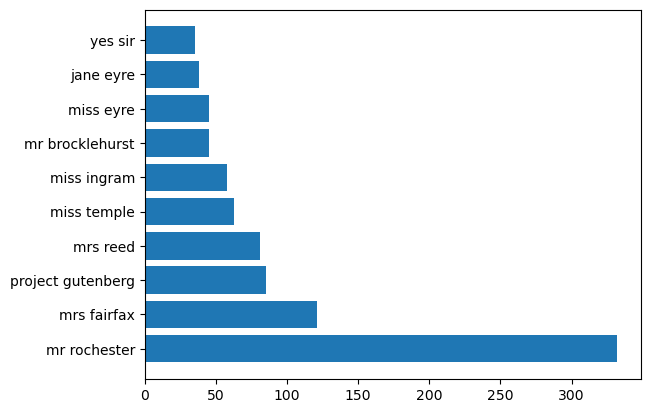

In [15]:
import matplotlib.pyplot as plt

word_counts = word_vect_df.sum(axis=0).sort_values(ascending=False)
plt.barh(y=word_counts.index[:10], width=word_counts[:10])
plt.show()

Many of the words with the highest frequencies are part of characters' names, which we expect to show up a lot more. However, the most common words may not always be provide a good representation of what a document/corpus is about, but we can check how 'informative' these terms are by finding their TF-IDF scores. **TF-IDF** (Term Frequency - Inverse Document Frequency) is a stastical method used to measure how important a term is within a document relative to the corpus as a whole.

In [16]:
tc = TfidfVectorizer(lowercase=True, 
                     stop_words=stopwords,
                     ngram_range=(2,2),
                     max_df=0.9,
                     min_df=0.1)

tc_vectors = tc.fit_transform(no_punct_chs)


tfidf_vect_df = pd.DataFrame(data=tc_vectors.toarray(), columns=tc.get_feature_names_out())
tfidf_vect_df.sample(10)

,actually took,adèle came,almost like,already made,another time,answer question,answered yes,anything else,arm chair,arms round,...,years since,yes right,yes said,yes sir,yes yes,yet could,yet know,yet said,young ladies,young lady
22,0.000000,0.081916,0.000000,0.081916,0.081916,0.000000,0.081916,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.262247,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.049280,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.051704,0.000000,0.0,0.140828,0.0,0.000000,0.054986,0.054986,0.212535,0.000000
7,0.000000,0.000000,0.000000,0.060430,0.000000,0.000000,0.000000,0.000000,0.05113,0.053772,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.046715,0.000000
21,0.104696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.067035,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.000000,0.000000,0.000000,0.000000,0.000000,0.063317,0.000000,0.000000,0.00000,0.056341,...,0.000000,0.063317,0.0,0.162163,0.0,0.000000,0.000000,0.000000,0.000000,0.051131
30,0.000000,0.000000,0.109129,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.081215,0.0,0.126842,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056861,0.00000,0.000000,...,0.000000,0.000000,0.0,0.072814,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
tfidf_vect_df.mean(axis=0).sort_values(ascending=False).head(20)

mr rochester       0.254307
st john            0.148947
mrs fairfax        0.116914
mrs reed           0.083966
miss temple        0.077260
miss ingram        0.062901
miss eyre          0.056189
mr rivers          0.054495
mr brocklehurst    0.046019
diana mary         0.041832
yes sir            0.041395
thornfield hall    0.040288
jane eyre          0.039254
mr st              0.036489
miss scatcherd     0.034366
helen burns        0.033323
mr mason           0.033289
last night         0.030306
miss jane          0.029874
could see          0.029271
dtype: float64

#### Term Co-Occurance

We may be interested in see how words co-occur with others words. In this case, we will use unigrams instead of bigrams. 

In [18]:
cvc = CountVectorizer(lowercase=True, 
                     stop_words=stopwords,
                     ngram_range=(1,1),
                    
                     min_df=0.001)

co_vectors = cvc.fit_transform(sent_tokens)

# matrix manipulation 
co_matrix = (co_vectors.T * co_vectors)

# setting the diagonals to 0 since it will always be 1 when we're comparing the same words
co_matrix.setdiag(0)

Below is a dataframe that shows how many times one word (column) co-occurs within the same sentence as another word (row)

In [19]:
co_cols = cvc.get_feature_names_out()
co_df = pd.DataFrame(data=co_matrix.toarray(), columns=co_cols, index=co_cols)
co_df.sample(10)

,abbot,able,absence,absolutely,absorbed,accent,accept,access,accompany,account,...,year,years,yes,yesterday,yet,yield,yonder,young,younger,youth
loss,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
become,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,2,0,0,0,0,0
fetch,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,1,0,0
regions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
uncle,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brain,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
frame,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
devil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
class,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
light,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,2,1,0,2,1,0


We may be interested in seeing what are the most common words that show up in the same sentence that 'rochester' (referring to Mr. Rochester) appears. 

In [20]:
co_df['rochester'].sort_values(ascending=False).head(20)

mr         362
said        50
would       40
see         33
mrs         31
fairfax     28
could       25
heard       24
never       22
go          18
like        18
room        17
hand        17
one         16
well        16
eyes        15
knew        15
yes         15
adèle       15
long        14
Name: rochester, dtype: int64

## Mini-project 2: Classification

#### Data: [On the Books Laws](https://cdr.lib.unc.edu/collections/f4752p47h?locale=en)



Classification allows us to separate documents into different groups depending on the language used in the text. Often, classification uses machine learning techniques. Two common types of machine learning are **supervised and unsupervised**.

### About the Data

This data comes from [On the Books: Jim Crow and Algorithms of Resistance](https://onthebooks.lib.unc.edu/), a text analysis project that discovered Jim Crow and racially-based legislation signed into law in North Carolina between 1866 and 1967. It uses supervised and unsupervised classification techniques to identify laws with race-based language and the type of legislation covered by those laws.

### Supervised Classification

Supervised classification requires what is known as a **training set**. A training set is a subset of documents that have been assigned classifications and manually labeled by humans. The labels will be used to train a model.

### Create Testing & Training Sets

We'll use Pandas to read in the On The Books training set.

In [21]:
import pandas as pd

df = pd.read_csv("https://unc-libraries-data.github.io/text_analysis_with_python/datasets/otb_training_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1785 non-null   object
 1   source                  1785 non-null   object
 2   jim_crow                1785 non-null   int64 
 3   chapter_num             1785 non-null   int64 
 4   section_num             1785 non-null   int64 
 5   chapter_text            1785 non-null   object
 6   section_text            1785 non-null   object
 7   year                    1785 non-null   int64 
 8   type_private laws       1785 non-null   int64 
 9   type_public laws        1785 non-null   int64 
 10  type_public local laws  1785 non-null   int64 
 11  type_session laws       1785 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 167.5+ KB


The column jim_crow contains a label of either 1 or 0 indicating whether the law is considered "Jim Crow" or "Not Jim Crow". The training set includes 1,785 labeled laws, with 512 examples of Jim Crow laws and 1,273 non Jim Crow laws.

In [22]:
df.jim_crow.value_counts()

jim_crow
0    1273
1     512
Name: count, dtype: int64

The training set also contains information about where the source of the labeling came from. Laws were labeled as Jim Crow or Not Jim Crow according to the work of legal scholars (Pauli Murray, Richard Paschal) and experts at UNC (William Sturkey and others).

In [23]:
df.source.value_counts()

source
project experts    1673
paschal              74
murray               38
Name: count, dtype: int64

To begin training a model, we need to pick a target for our classification, aka the "output". It is the thing we want our model to predict or the question we want it to answer. We want our model to predict whether a law is a Jim Crow law or not, so our target is the jim_crow column.

In [24]:
target = df["jim_crow"]

We also need to decide what other features we want the model to take into account when it predicts whether or not a law is Jim Crow. In this case, we have information about what year the law appears in the books and what type of law it is (private, public, public local or session). These features will be our "inputs".

In [25]:
features = df.loc[:, "section_text" : "type_session laws"]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   section_text            1785 non-null   object
 1   year                    1785 non-null   int64 
 2   type_private laws       1785 non-null   int64 
 3   type_public laws        1785 non-null   int64 
 4   type_public local laws  1785 non-null   int64 
 5   type_session laws       1785 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 83.8+ KB


When training a classification model, we can't use our entire training set, because then we'd have no labeled laws on which to test how well the model is performing. Supervised classification techniques require us to split the training set into training and testing subsets. We can use sklearn's train_test_split function to do accomplish the split. 

Note that test_size is set to 0.2. That means 80% of our data will be used for training and 20% will be used for testing.  We are also giving the "random_state" argument a number to ensure we all get the same results since train_test_split divides the data randomly. X_train and X_test will include the inputs. y_train and y_test will include the output.

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 25)

### Vectorize the text

We also need to use word frequency information to train the model. We'll use the CountVectorizer.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(decode_error = "ignore", min_df = 2, max_df = 1000)

In this case, we've chosen to ignore errors when it comes to characters with the wrong encoding. Additionally, we are not including any words that are too rarely used in the text (less than two times) or too often used (more than 1000 times).

Below, the vectorization is applied.

In [28]:
X_train = vec.fit_transform(X_train.section_text)
X_test = vec.transform(X_test.section_text)

### Train a Model

Now we need to decide on a machine learning classification model. In this case, we are using multinomial Naive Bayes which comes with sklearn.

In [29]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(X_train, y_train)



MultinomialNB()

### Test the Model

Now that we've trained the model on our data, let's use it on the testing set and see how well it did. Below, we apply the predict method of our model on the testing data (X_tests).

In [30]:
preds = nb.predict(X_test)

A common way to display the performance of a classification model is through a "confusion matrix". Below, we use the heatmap function in seaborn to visualize it.

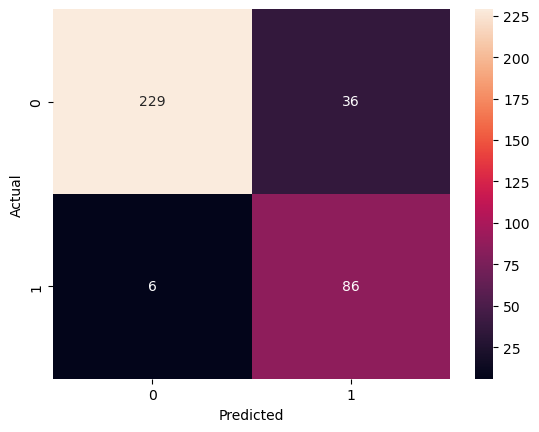

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

data = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

ax = sns.heatmap(df_cm,xticklabels=True, annot=True, fmt='.0f')

The matrix above compares the actual classifications to the predicted ones made by our model. Remember that 1 is the label for Jim Crow laws and 0 is the label for Non Jim Crow laws. Let's discuss each section of the matrix going clockwise.

**Top Left - True Negative**<br>
229 laws were labeled as Not Jim Crow and the model correctly predicted that they were Not Jim Crow.

**Top Right - False Positive**<br>
36 laws were labeled as Not Jim Crow, but the model incorrectly predicted that they were Jim Crow.

**Bottom Right - True Positive**<br>
86 laws were labeled as Jim Crow and the model correctly predicted that they were Jim Crow.

**Bottom Left - False Negative**<br>
6 laws were labeled as Jim Crow, but the model incorrectly predicted that they were Not Jim Crow.



This model is not accurate enough to move forward with, but we can always change the features and parameters used to train it and try and increase its accuracy.

The On the Books project used what is known as "Cross Validation" to compare the performance of multiple models at once. Ultimately, an [XGBoost](https://xgboost.readthedocs.io/en/stable/index.html) model performed the best. Python notebooks with code used in the project can be found on the [On The Books Git Hub](https://github.com/UNC-Libraries-data/OnTheBooks/).

## Mini-project 3: Sentiment Analysis

Sentiment analysis is another text analysis appraoch that is used to determine sentiment polarity (positive, neutral, negative) or emotional tone (happy, sad, etc.) of texts. Sentiment analysis approaches often fall within **dictionary based approaches** which use a lexicon (and often rule-modifiers) or **machine learning based approaches**. **Lexicon** refers to list of words that are mapped to a particular sentiment or emotion score. In this workshop, both tools used follow a dictionary based approach.

We will be using a [dataset of tweets about ChatGPT from Kaggle](https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis/data?select=file.csv) for this example. 

#### 1. Importing ChatGPT twitter data

In [32]:
import pandas as pd

df = pd.read_csv('https://unc-libraries-data.github.io/text_analysis_with_python/datasets/chatgpt_sentiment_sample.csv', encoding='utf-8')

In [33]:
df.shape

(50000, 3)

In [34]:
df.sample(10)

,Unnamed: 0,tweets,labels
29402,174367,🚨 Reminder: Special Broadcast starts in 10 min...,neutral
20329,140659,ChatGPT continues to blow my mind 😭,bad
23288,51892,"Cyber tools playground with ChatGPT. Relax, we...",good
39645,101573,My top #ChatGPT feature request: a side-note f...,bad
7172,72152,Natural language processing algorithms like th...,good
16239,130697,Is ChatGPT a ‘virus that has been released int...,neutral
15238,196066,The latest The Randy Lopez Daily! https://t.co...,neutral
32543,56855,Interesting...ChatGPT reads 'football' as the ...,neutral
1066,213967,anyone using #chatgpt in their podcat workflow...,bad
12570,68893,This ChatGPT AI program is unreal. I think the...,bad


#### 1. Simple Sentiment Analysis using Textblob

[`TextBlob`](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis) is a Python library that allows for easy access to text analysis methods such as parts-of-speech tagging, tokenization, term frequencies, sentiment analysis, and more. 

In [35]:
#! pip install textblob
from textblob import TextBlob

# simple example of TextBlob
example_tweet = TextBlob(df.tweets[22747])

example_tweet.sentiment_assessments

Sentiment(polarity=0.3833333333333333, subjectivity=0.5266666666666667, assessments=[(['very', 'politically'], 0.0, 0.13, None), (['good'], 0.7, 0.6000000000000001, None), (['becoming'], 0.45, 0.8500000000000001, None)])

`TextBlob.sentiment_assessments` returns the overall sentiment polarity and subjectivity of the sentence alongside the polarity and subjectivity of individual terms that make up the composite score. Polarity scores range from -1 (most negative) to 1 (most positive); subjectivity scores range from 0 (most objective) to 1 (most subjective). Below we can see the text that of the tweet that had a polarity score of 0.3 and a subjectivity score of 0.7.

In [36]:
df.tweets[22747]

'#chatgpt is very politically correct. this is good. keeps it from becoming biased. https://t.co/GcFjacvpYk'

In [37]:
# method to return the sentiment scores for a given text
def textblob_scores(text):
    try:
        return TextBlob(text).sentiment
    except:
        dict() # returns an empty dictionary if there is an issue with the text

In [38]:
# find the sentiment polarity/subjectivity scores for all the tweets in our sample dataframe
tweets_txtblob = df.tweets.apply(textblob_scores).apply(pd.Series)

# creates new columns in with those scores 
tweet_scores = pd.concat([df, tweets_txtblob], axis =1)

In [39]:
# renames columns so we can make sense of them 
tweet_scores.rename(columns={0: 'textblob_polarity', 1: 'textblob_subjectivity'}, inplace=True)

tweet_scores.sample(5)

,Unnamed: 0,tweets,labels,textblob_polarity,textblob_subjectivity
11381,17860,ChatGPT is the new Wordle.,bad,0.136364,0.454545
48111,55895,ChatGPT is so convenient and scary AF at the s...,bad,-0.250000,0.562500
33515,95859,"ChatGPT, Galactica, and the Progress Trap http...",neutral,0.000000,0.000000
8897,32610,📰 ChatGPT passes the 2022 AP Computer Science ...,good,0.400000,0.800000
38519,67054,ChatGPT is an unfair advantage fr,bad,-0.500000,1.000000


#### 2. Sentiment Analysis using NLTK

[`NLTK`](https://www.nltk.org/) has has a  `SentimentintensityAnalyzer` module for sentiment analysis which uses the [**Vader model**](https://ojs.aaai.org/index.php/ICWSM/article/view/14550). Vader uses both a sentiment valence lexicon alongside rule-based modifiers to determine sentiment scores. **Valence** refers to the direction and intensity of a score ("worst" vs "bad" vs "best").

Unlike the sentiment scores from `TextBlob`, the scores for individual words in `Vader` range from -4 (most negative) to +4 (most positive).

In [40]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rolando\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We can take a look into the lexicon to see the scores of some common emotive words.

In [41]:
print(f"Score for 'sad': {sid.lexicon['sad']}")
print(f"Score for 'happy': {sid.lexicon['happy']}")

Score for 'sad': -2.1
Score for 'happy': 2.7


Below we can see how rule-based modifiers affect the overall score of a text. 

The `polarity_scores` method returns four values: `neg` (negative), `neu` (neutral), `pos` (positive), and `compound`. 

The negative, neutral, and positive are standardized scores that range from 0-1 and add up to 1, while the compound score is normalized on a -1 (negative) to 1 (positive) range. 

In [42]:
input_text = ["that was good", "that was GOOD" ,"that was good!", "that was good!!", 
              "that was good!!!", "that was extremely good", "that was good, but not great"]

pd.DataFrame([{'input':text} | sid.polarity_scores(text) for text in input_text])

,input,neg,neu,pos,compound
0,that was good,0.000,0.408,0.592,0.4404
1,that was GOOD,0.000,0.355,0.645,0.5622
2,that was good!,0.000,0.385,0.615,0.4926
3,that was good!!,0.000,0.365,0.635,0.5399
4,that was good!!!,0.000,0.346,0.654,0.5826
5,that was extremely good,0.000,0.484,0.516,0.4927
6,"that was good, but not great",0.427,0.385,0.188,-0.5409


In [43]:
def vader_scores(text):
    try:
        return sid.polarity_scores(text)
    except:
        return dict()


tweets_vader = df.tweets.apply(vader_scores).apply(pd.Series)
tweet_scores = pd.concat([tweet_scores, tweets_vader], axis =1)

In [44]:
tweet_scores.rename(columns={"neg": "vader_neg", "neu": "vader_neu", "pos": "vader_pos", "compound":"vader_compound"}, inplace=True)

In [45]:
tweet_scores.sample(10)

,Unnamed: 0,tweets,labels,textblob_polarity,textblob_subjectivity,vader_neg,vader_neu,vader_pos,vader_compound
23354,77454,What is #ChatGPT https://t.co/x7nCAyTVXh,bad,0.000000,0.000000,0.000,1.000,0.000,0.0000
47570,91371,Did anybody notice this scrollbar beauty in th...,good,0.000000,0.000000,0.000,0.833,0.167,0.5859
10550,154626,"Sorry for the cursing, but the man is such a f...",bad,-0.433333,0.766667,0.208,0.792,0.000,-0.7218
23285,84760,For this brief moment in time there are only t...,bad,0.000000,0.666667,0.000,1.000,0.000,0.0000
36861,103627,I asked chatGPT to imagine itself becoming sen...,bad,0.350000,0.658333,0.046,0.954,0.000,-0.1531
26680,134833,The Brilliance and Weirdness of ChatGPT https:...,neutral,0.000000,0.000000,0.176,0.463,0.361,0.4588
20476,66978,Just tried #ChatGPT. I seem to have broken it...,bad,0.112500,0.700000,0.222,0.589,0.190,-0.1260
40239,213704,Some thoughts @PaquitoFalder and I have on how...,bad,0.000000,0.100000,0.094,0.906,0.000,-0.3612
35946,46099,AI-generated answers temporarily banned on cod...,bad,0.000000,0.000000,0.214,0.786,0.000,-0.4588
5984,82907,I have a 94 page google doc saved with my ONE ...,neutral,0.000000,0.000000,0.000,0.823,0.177,0.4215


In [46]:
bestlist = tweet_scores.sort_values("vader_compound", ascending=False).tweets.tolist()
print(bestlist[0])

Dear friends and colleagues! I wish you a wonderful festive time, health, happiness, and professional success! To celebrate with #AI, I asked #chatGPT to write me a romantic Xmas poem, and it was lovely https://t.co/CeZk9ObNsc 😀 All the best! Elena https://t.co/UC2u3L84nh


In [47]:
worstlist = tweet_scores.sort_values("vader_compound", ascending=True).tweets.tolist()
print(worstlist[0])

pov\nits ur rotation of the sun\nu have a large spine dat hurts (boohoo)\nu stay in bed til 9 cause cozy\ngets out of bed\nchatgpt not solving mystery\nblender rass =crap\nFever gone but itchy. Hungry and eat doggy food. Itchy itchy Scott came. Ugly face so killed him. Tasty. 4. Itchy.


We can plot the composite scores from `TextBlob` against `NLTK`'s Vader module to get a sense of how they compare.

<Axes: xlabel='textblob_polarity', ylabel='vader_compound'>

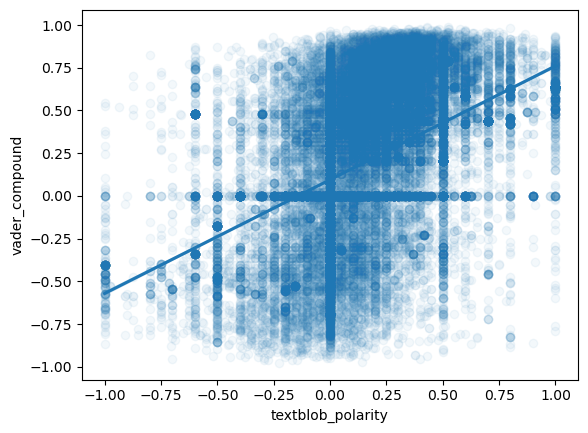

In [48]:
import seaborn as sns

sns.regplot(data = tweet_scores, x="textblob_polarity", y = "vader_compound", scatter_kws = {"alpha":0.05})

## Additional Resources

1. [Text and Data Mining Libguide](https://guides.lib.unc.edu/tdm) - some best practices tips
2. [Python Crash Course Material](https://unc-libraries-data.github.io/Python/) - intro to Python and Pandas utilities
3. [Text Analysis Seminar Google Drive](https://drive.google.com/drive/folders/159upIOGEYZu2Qdbu9NdyGUYaG5OK9-OO)
    - if you want to receive emails, add your information to the [roster](https://docs.google.com/spreadsheets/d/1Z6T7Y-bq33C9TMQ7MjzKIdvW6g5wzi4-cJQwtriAGKk/edit#gid=0)
4. [Library Data Services](https://library.unc.edu/data/) - get in contact with librarians